In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ta

In [8]:
dataset_train = pd.read_csv('train.csv')
dataset_train = dataset_train.drop(["Date","Turnover (Lacs)"], axis=1)
RSI=ta.momentum.rsi(close=dataset_train['Close'])
MFI=ta.volume.money_flow_index(dataset_train['High'], dataset_train['Low'], dataset_train['Close'], dataset_train['Total Trade Quantity'],n=14)
dataset_train["RSI"]= RSI
dataset_train["MFI"]=MFI
dataset_train= ta.utils.dropna(dataset_train)
dataset_train.head()
print(len(dataset_train))

787


In [9]:
training_set = dataset_train.iloc[:,:].values

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [11]:
X_train = []
y_train = []
for i in range(60, 786):
    X_train.append(training_set_scaled[i-60:i])
    y_train.append(training_set_scaled[i,4])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 8))

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\HI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Future

In [13]:
regressor = Sequential()

regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 8)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 1, batch_size = 32)


Epoch 1/1
726/726 [==============================] - 3s 4ms/step - loss: 0.0350


In [15]:
dataset_test = pd.read_csv('test.csv')
real_stock_price = dataset_test.iloc[:, 5:6].values
print(len(real_stock_price))
dataset_test = dataset_test.drop(["Date","Turnover (Lacs)"], axis=1)
RSI=ta.momentum.rsi(close=dataset_test['Close'])
MFI=ta.volume.money_flow_index(dataset_test['High'], dataset_test['Low'], dataset_test['Close'], dataset_test['Total Trade Quantity'],n=14)
dataset_test["RSI"]= RSI
dataset_test["MFI"]=MFI
dataset_test= ta.utils.dropna(dataset_test)

300


In [16]:
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-73:].values
inputs = inputs.reshape(-1,8)
inputs = sc.transform(inputs)
print(len(dataset_total)-len(dataset_test)-60)

727


In [17]:
X_test = []
print(len(inputs))
for i in range(60, 360) :
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],8))
predicted_stock_price = regressor.predict(X_test)
print(len(predicted_stock_price))

360
300


In [18]:
predicted_stock_price1 = np.zeros(shape=(len(X_test), 8) )
predicted_stock_price1[:,4] = predicted_stock_price[:,0]
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price1)[:,4]

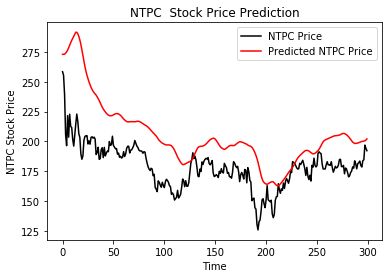

In [19]:
plt.plot(real_stock_price, color = 'black', label = 'NTPC Price')
plt.plot(predicted_stock_price2, color = 'red', label = 'Predicted NTPC Price')
plt.title('NTPC  Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NTPC Stock Price')
plt.legend()
plt.show()

In [20]:
estimation_percentage=(real_stock_price-predicted_stock_price2)
estimation_percentage.mean()

-26.844913111487994

In [21]:
dataset_test1 =dataset_total[len(dataset_total)-len(dataset_test)-73:].values

In [29]:
inputt=[]
inputt=dataset_test1
inputt = inputt.reshape(-1,8)

In [35]:
inputt = sc.transform(inputt)
X_test1 = []
for i in range(60, 61) :
    X_test1.append(inputt[i-60:i])
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 8))
predicted_stock_price1 = regressor.predict(X_test1)
#predicted_stock_price1 = sc.inverse_transform(predicted_stock_price1)


[[-0.29998937]]


In [27]:
print(predicted_stock_price1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
